# Import

In [1]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# Data

Read in our univeristy and crime data as a dataframe, then split the outcomes and the features into arrays. ONly using 2 feautures for now, since we can only use quantitative data at the moment.... to be added later.

In [7]:
df = pd.read_csv('cleaned.csv', encoding='iso-8859-1')

print(df)

      Unnamed: 0  UNITID                                             INSTNM  \
0              1  100654                           Alabama A & M University   
1              2  100663                University of Alabama at Birmingham   
2              3  100690                                 Amridge University   
3              4  100706                University of Alabama in Huntsville   
4              5  100724                           Alabama State University   
5              6  100751                          The University of Alabama   
6              7  100760                  Central Alabama Community College   
7              8  100812                            Athens State University   
8              9  100830                    Auburn University at Montgomery   
9             10  100858                                  Auburn University   
10            11  100937                        Birmingham Southern College   
11            12  101028             Chattahoochee V

In [84]:
crime = df['crime_rate'] #outcomes
crime_rate = np.array(crime)
print(crime_rate)

[ 3.56272267  1.60444967  0.         ...,  0.          0.          0.        ]


In [108]:
feature = df.drop('crime_rate',axis=1) #variables
#features = feature.to_dict()['fin_indep']
features = np.array(feature[['fin_indep','student_pop']])
print(features)

[[  1.29593046e-01   5.33300000e+03]
 [  3.11615321e-01   1.86980000e+04]
 [  8.94259819e-01   6.25000000e+02]
 ..., 
 [  7.74729842e-01   7.50000000e+01]
 [  5.03105590e-01   6.70000000e+01]
 [  6.36593060e-01   2.43100000e+03]]


# Train-Test split

Split 80-20 train and test data, to use for model.

In [109]:
#split train and test data
feat_train, feat_test, crime_train, crime_test = train_test_split(features, crime_rate, test_size = 0.2, random_state=11)

In [110]:
#features set
print(feat_train)
print(feat_test.shape)
#outcome set
print(crime_train.shape)
print(crime_test.shape)

[[  2.39789196e-01   2.21900000e+03]
 [  6.11242604e-01   5.76000000e+02]
 [  7.66233766e-01   2.20100000e+03]
 ..., 
 [  7.64675855e-01   2.73000000e+02]
 [  7.43488556e-01   1.41000000e+02]
 [  6.23847572e-01   5.47500000e+03]]
(1158, 2)
(4632,)
(1158,)


# Scaling/Standardize

In [159]:
mins = np.min(feat_train, axis = 0)
maxes = np.max(feat_train, axis = 0)
diff = maxes - mins

In [160]:
diff

array([  9.61869136e-01,   1.95058000e+05])

In [162]:
feat_train_stand = (feat_train - mins) / diff
feat_test_stand = (feat_test - mins) / diff

In [163]:
minCrime = np.min(crime_train)
maxCrime = np.max(crime_train)
diffCrime = maxCrime - minCrime

In [164]:
crime_train_stand = (crime_train - minCrime) / diffCrime
crime_test_stand = (crime_test - minCrime) / diffCrime

# K-Fold Cross Validation


In [179]:
kValues = [1, 2, 3, 4, 100, 200, 3000, 4000]

In [180]:
folds = KFold(len(feat_train), n_folds = 10, shuffle = True)
print(folds)

sklearn.cross_validation.KFold(n=4632, n_folds=10, shuffle=True, random_state=None)


In [181]:
for train_index, val_index in folds:
        print(train_index)

[   0    1    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    2    3 ..., 4627 4629 4630]
[   1    2    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4628 4629 4631]
[   0    1    2 ..., 4628 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]


In [182]:
scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds:
        current_train_feat = feat_train_stand[train_index]
        current_val_feat = feat_train_stand[val_index]
        current_train_crime, current_val_crime = crime_train[train_index], crime_train[val_index]
        neigh = KNeighborsRegressor(n_neighbors = k)
        neigh.fit(current_train_feat, current_train_crime)
        guesses = neigh.predict(current_val_feat)
        rmse = np.sqrt(mean_squared_error(guesses, current_val_crime))
        currentScores.append(rmse)
    scores[k] = currentScores

# Plotting Error

In [183]:
keys = sorted(scores.keys())
means = []
stdevs = []
for each in keys:
    current = scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

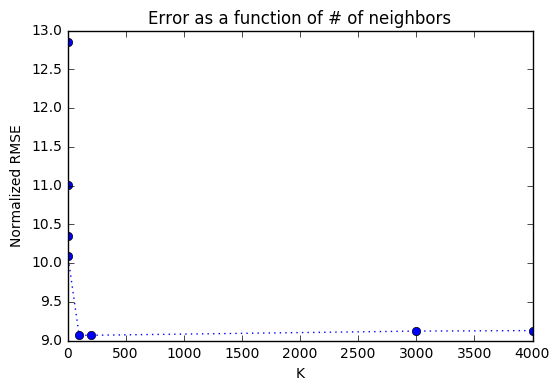

In [184]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')

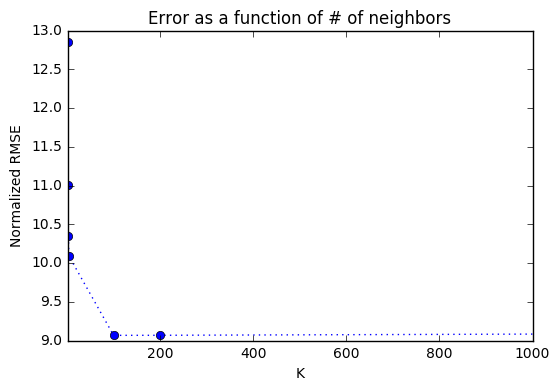

In [193]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')
plt.xlim([1,1000]);

From this, somewhere around 100-150 would be our ideal K neighbors, however this is probably a very inaccurate model since we only consider 2 features. 